# Book Recommendation System

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_colwidth', -1)

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## EDA

In [3]:
# There are three dataset contains users, book and rating information.
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
book = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, escapechar='\\', encoding='latin-1')
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [4]:
print('Users: ', users.shape)
print('Book: ', book.shape)
print('Ratings: ', ratings.shape)

Users:  (278858, 3)
Book:  (271379, 8)
Ratings:  (1149780, 3)


In [5]:
display('users.head()', 'ratings.head()', 'book.head(3)')

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3


In [6]:
print('Max. Age: ', users['Age'].max())
print('Min. Age: ', users['Age'].min())

Max. Age:  244.0
Min. Age:  0.0


In [7]:
users.isnull().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [8]:
book.nunique()

ISBN                   271379
Book-Title             242154
Book-Author            102027
Year-Of-Publication    116   
Publisher              16806 
Image-URL-S            271063
Image-URL-M            271063
Image-URL-L            271063
dtype: int64

In [9]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [10]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating    11    
dtype: int64

In [11]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
sorted(ratings['Book-Rating'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating    11    
dtype: int64

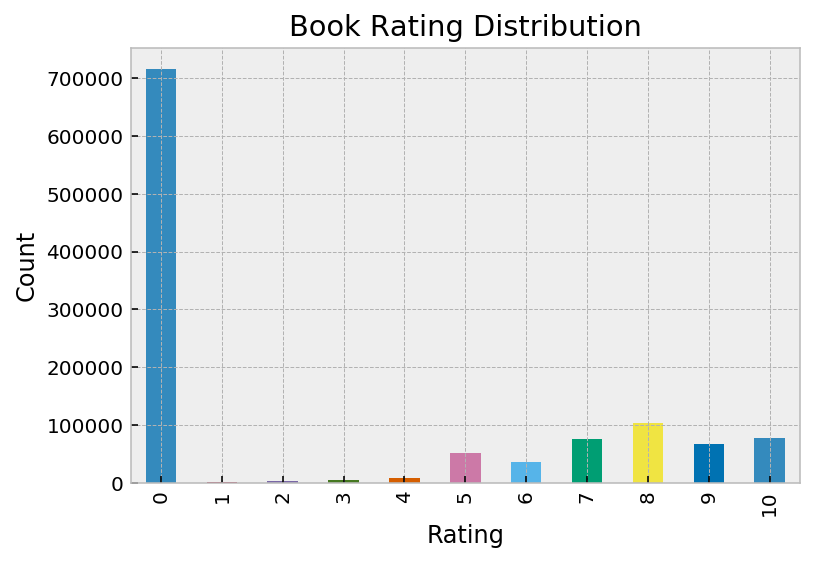

In [14]:
# Majority of the data have 0 rating.
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Book Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

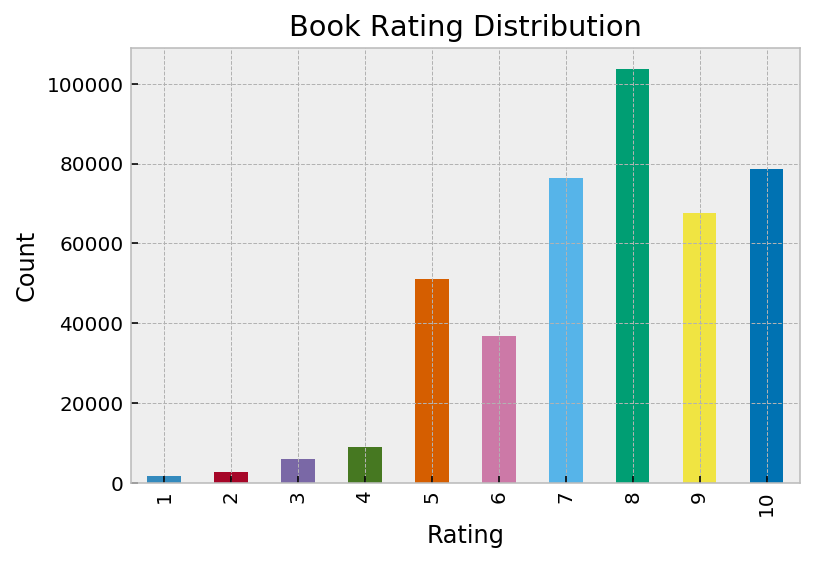

In [15]:
# For book have rating, majority is above rating 4.
ratings['Book-Rating'].value_counts(sort=False)[1:].plot(kind='bar')
plt.title('Book Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
# Join dataset on book number.
df = ratings.merge(book, how='left', on='ISBN')
df.dropna(inplace=True)
df.drop(['Image-URL-S', 'Image-URL-M'], axis=1, inplace=True)
df.columns = ['ID', 'ISBN', 'rating', 'title', 'author', 'year', 'publisher', 'image']
df['year'] = df['year'].astype(int)
df.shape

(1031172, 8)

In [17]:
df.head(5)

,ID,ISBN,rating,title,author,year,publisher,image
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.01.LZZZZZZZ.jpg
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.01.LZZZZZZZ.jpg
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge English Readers),Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.01.LZZZZZZZ.jpg


In [18]:
# There are incorrect Year: '0' and future year.
print(sorted(df['year'].unique()))
print()
print('No. of rows with Year 0: ', df.query('year == 0').shape)
print('No. of rows with future Year: ', df.query('year >= 2020').shape)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]

No. of rows with Year 0:  (14010, 8)
No. of rows with future Year:  (66, 8)


In [19]:
# For simplicity, rows with incorrect year are dropped.
idx = df.query('year == 2020 or year >= 2020').index
df.drop(idx, inplace=True)
df.reset_index(drop=True, inplace=True)

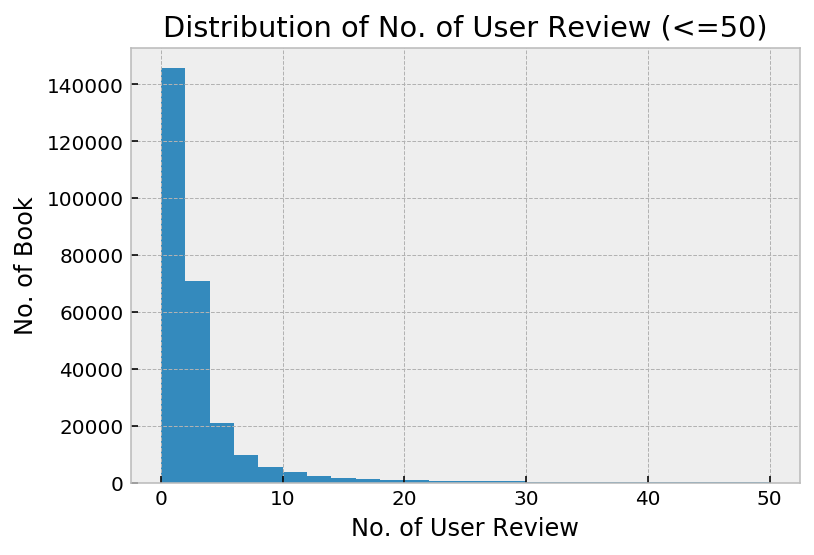

In [20]:
# Majority of book only has less than 10 reviews.
df.groupby('ISBN').count()['rating'].hist(bins=range(0, 51, 2))
plt.title('Distribution of No. of User Review (<=50)')
plt.xlabel('No. of User Review')
plt.ylabel('No. of Book')
plt.show()

In [21]:
# We will choose books with more than 100 reviews.
s = df.groupby('ISBN').count()['rating']
isbn = s[s <= 100].index
idx = df.query('ISBN in @isbn').index
df.drop(idx, inplace=True)
df.shape

(136423, 8)

In [22]:
df.query('rating == 0')

,ID,ISBN,rating,title,author,year,publisher,image
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.01.LZZZZZZZ.jpg
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.01.LZZZZZZZ.jpg
8,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.01.LZZZZZZZ.jpg
9,276746,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.01.LZZZZZZZ.jpg
10,276746,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.01.LZZZZZZZ.jpg
27,276762,0451167317,0,The Dark Half,Stephen King,1994,Signet Book,http://images.amazon.com/images/P/0451167317.01.LZZZZZZZ.jpg
126,276832,0316781266,0,The Last Time They Met : A Novel,Anita Shreve,2002,Back Bay Books,http://images.amazon.com/images/P/0316781266.01.LZZZZZZZ.jpg
133,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993,Warner Books,http://images.amazon.com/images/P/0446364193.01.LZZZZZZZ.jpg
309,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
334,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.01.LZZZZZZZ.jpg


## User-based Collaborative Filtering

## Item-based Collaborative Filtering

## Content Based